/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Perceptron (No Activation) - Loss: 0.7456070780754089
Neural Network with ReLU - Loss: 0.5311981439590454
Neural Network with Sigmoid - Loss: 0.5623133778572083
Neural Network with Tanh - Loss: 0.5269724726676941


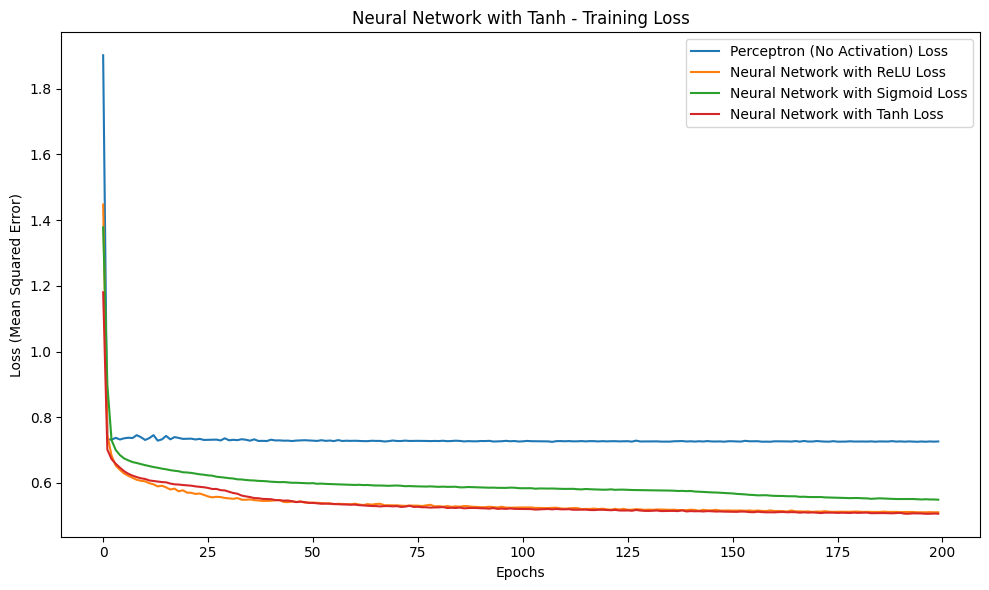

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


('/content/sample_data/Perceptron (No Activation)_predictions_vs_true_values.png',
 '/content/sample_data/Neural Network with ReLU_predictions_vs_true_values.png',
 '/content/sample_data/Neural Network with Sigmoid_predictions_vs_true_values.png',
 '/content/sample_data/Neural Network with Tanh_predictions_vs_true_values.png')

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Load the California Housing dataset (Regression Problem)
california_housing = fetch_california_housing()

# Convert the dataset into a pandas DataFrame
df_california = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df_california['target'] = california_housing.target

# Features and target
X = df_california.drop(columns=['target'])
y = df_california['target'].values

# Standardizing the features (important for PCA and neural networks)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=5)  # Reduce to 5 principal components
X_pca = pca.fit_transform(X_scaled)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Function to build and train models with multiple layers and neurons
def build_and_train_model(activation_function, model_name, hidden_layers, neurons_per_layer):
    model = Sequential()

    # First hidden layer with specified neurons and activation function
    model.add(Dense(neurons_per_layer, input_dim=X_train.shape[1], activation=activation_function))

    # Additional hidden layers
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons_per_layer, activation=activation_function))

    # Output layer for regression (single neuron)
    model.add(Dense(1, activation=None))  # No activation function for regression

    # Compile the model
    model.compile(optimizer=Adam(), loss='mean_squared_error')  # Using MSE for regression

    # Train the model
    history = model.fit(X_train, y_train, epochs=200, verbose=0)

    # Evaluate the model on the test set
    loss = model.evaluate(X_test, y_test, verbose=0)

    print(f"{model_name} - Loss: {loss}")

    return model, history

# Number of hidden layers and neurons per layer
hidden_layers = 3
neurons_per_layer = 10

# 1. Perceptron (no activation function)
perceptron_model, perceptron_history = build_and_train_model(None, "Perceptron (No Activation)", hidden_layers, neurons_per_layer)

# 2. Neural network with ReLU activation function
relu_model, relu_history = build_and_train_model('relu', "Neural Network with ReLU", hidden_layers, neurons_per_layer)

# 3. Neural network with Sigmoid activation function
sigmoid_model, sigmoid_history = build_and_train_model('sigmoid', "Neural Network with Sigmoid", hidden_layers, neurons_per_layer)

# 4. Neural network with Tanh activation function
tanh_model, tanh_history = build_and_train_model('tanh', "Neural Network with Tanh", hidden_layers, neurons_per_layer)

# Function to plot the training loss for each model
def plot_loss(history, model_name):
    plt.plot(history.history['loss'], label=f'{model_name} Loss')
    plt.title(f'{model_name} - Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss (Mean Squared Error)')
    plt.legend()

# Plotting loss for each model
plt.figure(figsize=(10, 6))

plot_loss(perceptron_history, "Perceptron (No Activation)")
plot_loss(relu_history, "Neural Network with ReLU")
plot_loss(sigmoid_history, "Neural Network with Sigmoid")
plot_loss(tanh_history, "Neural Network with Tanh")

plt.tight_layout()
plt.show()

# Function to create individual predictions and plots for each model
def create_model_plot(model, X_test, y_test, predictions, model_name):
    plt.figure(figsize=(8, 5))
    plt.scatter(range(len(y_test)), y_test, color='blue', label='True Values', s=80)
    plt.scatter(range(len(y_test)), predictions, color='red', label=f'Predictions ({model_name})', marker='x')
    plt.title(f"{model_name} - Predictions vs True Values")
    plt.xlabel("Sample Index")
    plt.ylabel("House Value (Target)")
    plt.legend()
    image_path = f'/content/sample_data/{model_name}_predictions_vs_true_values.png'
    plt.savefig(image_path)
    plt.close()
    return image_path

# Predictions for each model
predictions_perceptron = perceptron_model.predict(X_test)
predictions_relu = relu_model.predict(X_test)
predictions_sigmoid = sigmoid_model.predict(X_test)
predictions_tanh = tanh_model.predict(X_test)

# Create and save individual images
image_perceptron = create_model_plot(perceptron_model, X_test, y_test, predictions_perceptron, "Perceptron (No Activation)")
image_relu = create_model_plot(relu_model, X_test, y_test, predictions_relu, "Neural Network with ReLU")
image_sigmoid = create_model_plot(sigmoid_model, X_test, y_test, predictions_sigmoid, "Neural Network with Sigmoid")
image_tanh = create_model_plot(tanh_model, X_test, y_test, predictions_tanh, "Neural Network with Tanh")

# Return all the image paths
(image_perceptron, image_relu, image_sigmoid, image_tanh)
